### **1. Data preprocessing (konwersja, usunięcie pustych wartości etc.)**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('countries.csv', sep=';')
df = df.drop(index=0) # Remove data types row

In [10]:
# Convert data types
df['Country'] = df['Country'].astype('string')
num_cols = df.columns
num_cols = [x for x in num_cols if x != 'Country']
df[num_cols] = df[num_cols].astype(float)
df.dtypes

Country                                           string[python]
Area(sq km)                                              float64
Birth rate(births/1000 population)                       float64
Current account balance                                  float64
Death rate(deaths/1000 population)                       float64
Debt - external                                          float64
Electricity - consumption(kWh)                           float64
Electricity - production(kWh)                            float64
Exports                                                  float64
GDP                                                      float64
GDP - per capita                                         float64
GDP - real growth rate(%)                                float64
HIV/AIDS - adult prevalence rate(%)                      float64
HIV/AIDS - deaths                                        float64
HIV/AIDS - people living with HIV/AIDS                   float64
Highways(km)             

### **2. Wizualizacja danych**

##### Porównanie PKB i długu publicznego (% PKB) z 15-stu największych państw pod względem PKB 

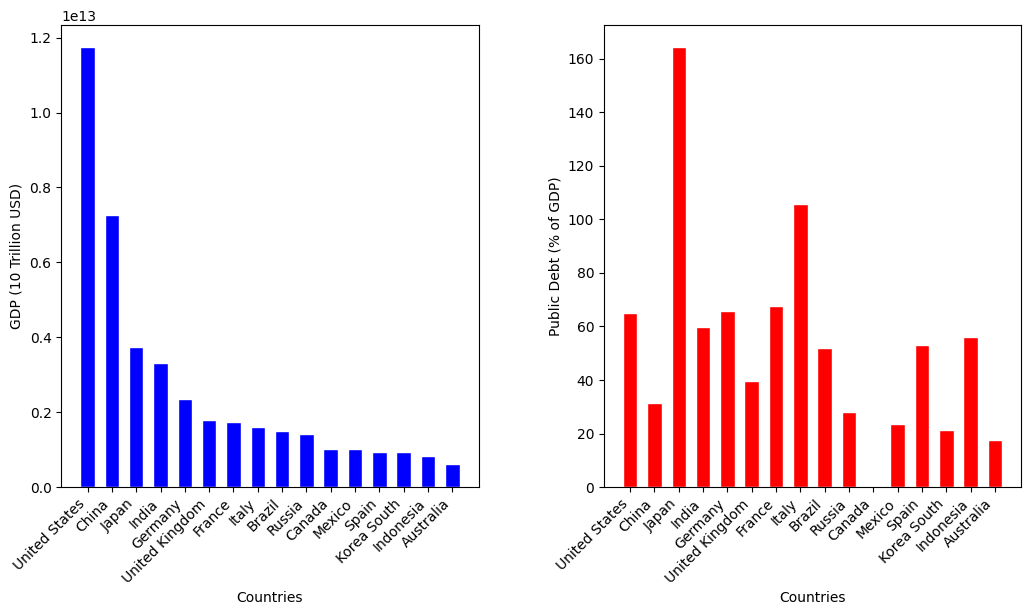

In [11]:
df_nn = df.dropna(axis=0, subset=['GDP'])
df_nn = df_nn.sort_values(by='GDP', ascending=False)

# Remove EU from set
eu = df_nn['Country'] == '#European Union'
df_nn = df_nn.drop(df_nn.index[eu])

countries = df_nn['Country'].head(16).to_list()
gdp = df_nn['GDP'].head(16).to_list()
public_debt = df_nn[f'Public debt(% of GDP)'].head(16).to_list()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(countries, gdp, color='blue', width=0.6, edgecolor='white')
ax1.set_xticks(range(len(countries)))
ax1.set_xticklabels(countries, rotation=45, ha='right')
ax1.set_xlabel('Countries')
ax1.set_ylabel('GDP (10 Trillion USD)')

ax2.bar(countries, public_debt, color='red', width=0.6, edgecolor='white')
ax2.set_xticks(range(len(countries)))
ax2.set_xticklabels(countries, rotation=45, ha='right')
ax2.set_xlabel('Countries')
ax2.set_ylabel(f'Public Debt (% of GDP)')

plt.subplots_adjust(left=0.1, right=0.9, wspace=0.3)
plt.show()

Kraje są posortowane malejąco (PKB), na wykresach możemy zauważyć, że procentowo najbardziej zadłużonym krajem jest Japonia oraz Włochy, zaś nominalnie USA, które jednocześnie posiada najwyższy wskaźnik PKB odbiegający od innych państw.

##### Porównanie zużycia energii i populacji w USA, UE i Chinach

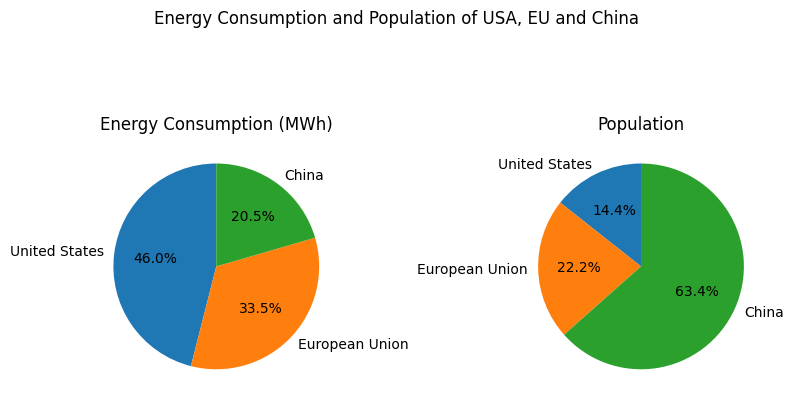

In [12]:
df_energy = df.sort_values(by='GDP', ascending=False)
countries = df_energy['Country'].head(3).to_list()
energy_consumption = df_energy['Electricity - consumption(kWh)'].head(3).to_list()
population = df_energy['Population'].head(3).to_list()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))

ax1.pie(energy_consumption, labels=['United States', 'European Union', 'China'], autopct="%1.1f%%", startangle=90)
ax1.set_title("Energy Consumption (MWh)")

ax2.pie(population, labels=['United States', 'European Union', 'China'], autopct="%1.1f%%", startangle=90)
ax2.set_title("Population")

plt.suptitle("Energy Consumption and Population of USA, EU and China")
plt.tight_layout()

plt.show()

##### Korelacja na macierzy: PKB per capita oraz HIV/AIDS - wzkaźnik zachorowań wśród dorosłych(%) z 50-ciu najbiedniejszych państw pod względem PKB

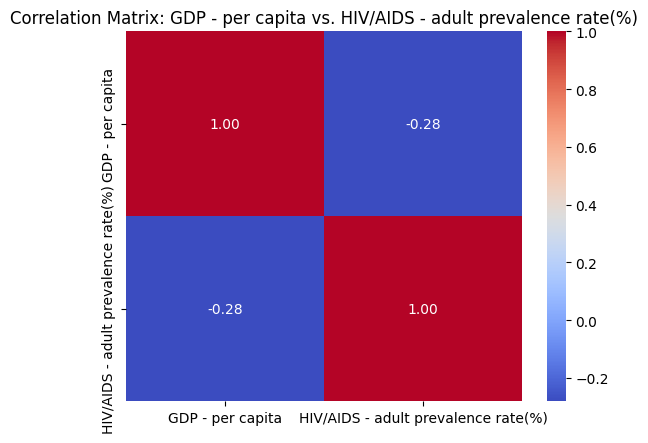

In [18]:
corr_df_sorted = df.sort_values(by='GDP', ascending=False)
corr_df = corr_df_sorted[['GDP - per capita', 'HIV/AIDS - adult prevalence rate(%)']].iloc[150:200]
corr_df.dropna(inplace=True)
correlation_matrix = corr_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: GDP - per capita vs. HIV/AIDS - adult prevalence rate(%)')
plt.show()